<a href="https://colab.research.google.com/github/PoulYak/EVRAZ/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Данный датасет был создан при использовании взятых из открытых источников данных и остальных ноутбуков в данной папке

In [3]:
pd.options.display.max_columns = None
df = pd.read_csv('DataFrame.csv')
df.columns = list(df.columns[:-2])+list(['square', 'count'])


В нём собраны такие данные как индексы пожароопасности _ПВ1_, _КПО_, _КПО2_, _нормализованный относительный индекс растительности_, _точка росы_, _гидротермический коэффициент_, _относительная влажность воздуха_, _влажность почвы_, _температура_, _температура почвы_, _количество осадков_, _площадь территории покрытой снегом_, _глубина снежного покрова_, _сила ветра_, _площадь пожара_, _количество очагов возгораний_

In [4]:
df.describe()

,PV1,KPO,KPO2,NDVI,dew_point,hidro_coeff,humid,humid_gr,prop_quantity,temp,temp_soil,snow_area,snow_depth,power_wind,square,count
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,132.878255,97.320866,3138.630897,0.300273,1.557936,1.058003,37.779727,37.779727,2.311995,7.688525,5.389568,40.719401,0.064002,3.811475,21813.595628,2.748634
std,166.267986,274.307207,9187.821494,0.281382,2.857096,1.245025,7.028681,7.028681,2.840599,12.692167,9.446306,41.825352,0.081630,1.787316,64166.849192,6.020712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.955000,20.955000,0.000000,-25.200000,-12.941000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.627375,0.000000,0.000000,0.000000,0.000000,0.000000,33.230000,33.230000,0.500000,-2.275000,-3.212000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,47.534726,0.000000,0.000000,0.318000,0.000000,0.339500,37.271250,37.271250,1.400000,6.600000,4.134000,14.935000,0.004125,4.000000,0.000000,0.000000
75%,181.206450,13.740415,233.373502,0.543000,1.964359,2.027500,46.791875,46.791875,3.100000,19.350000,14.288500,90.147375,0.138187,5.000000,46.000000,2.000000
max,748.037150,1527.116564,58998.868617,0.777000,12.859483,5.232000,46.800000,46.800000,19.700000,31.500000,22.213000,100.000000,0.458667,10.000000,243368.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PV1            366 non-null    float64
 1   KPO            366 non-null    float64
 2   KPO2           366 non-null    float64
 3   NDVI           366 non-null    float64
 4   dew_point      366 non-null    float64
 5   hidro_coeff    366 non-null    float64
 6   humid          366 non-null    float64
 7   humid_gr       366 non-null    float64
 8   prop_quantity  366 non-null    float64
 9   temp           366 non-null    float64
 10  temp_soil      366 non-null    float64
 11  snow_area      366 non-null    float64
 12  snow_depth     366 non-null    float64
 13  power_wind     366 non-null    int64  
 14  square         366 non-null    int64  
 15  count          366 non-null    int64  
dtypes: float64(13), int64(3)
memory usage: 45.9 KB


## Обзор
Имеются годовые экземпляры данных. Общее количество атрибутов 16, из них 14 количественных, площадь пожара(square) и количество пожаров(count)

_Количественные_: PV1, KPO, KPO2, NDVI, dew_point, hidro_coeff, humid, humid_gr, prop_quantity, temp, temp_soil, snow_area, snow_depth, power_wind, square, count

Пропущенных значений во всей выборке нет)


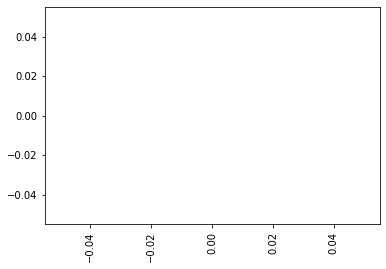

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
try:
    missing.plot.bar()
except:
    print('Пропущенных значений во всей выборке нет)')

Во всей выборке отсутсвуют пропущенные значения

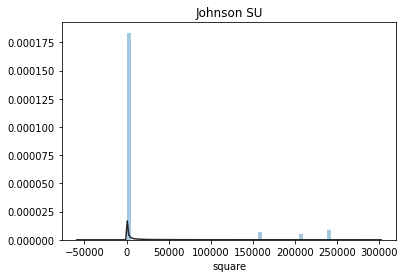

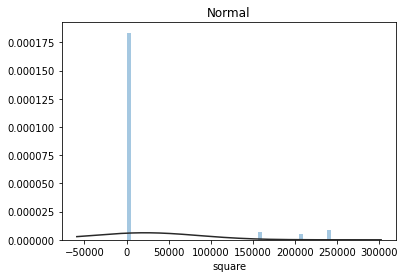

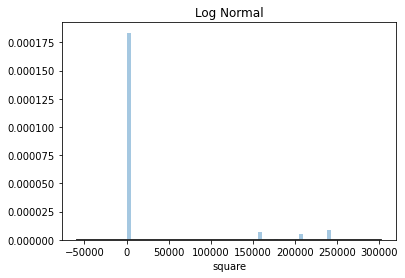

In [7]:
import scipy.stats as st
y = df.square
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Очевидно, что переменная square не следует нормальному распределению, поэтому перед выполнением регрессии его необходимо преобразовать. 

In [8]:
quantitative = df.columns[:-2]

In [9]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


Также ни одна из количественных переменных не имеет нормального распределения, поэтому их также следует преобразовать.

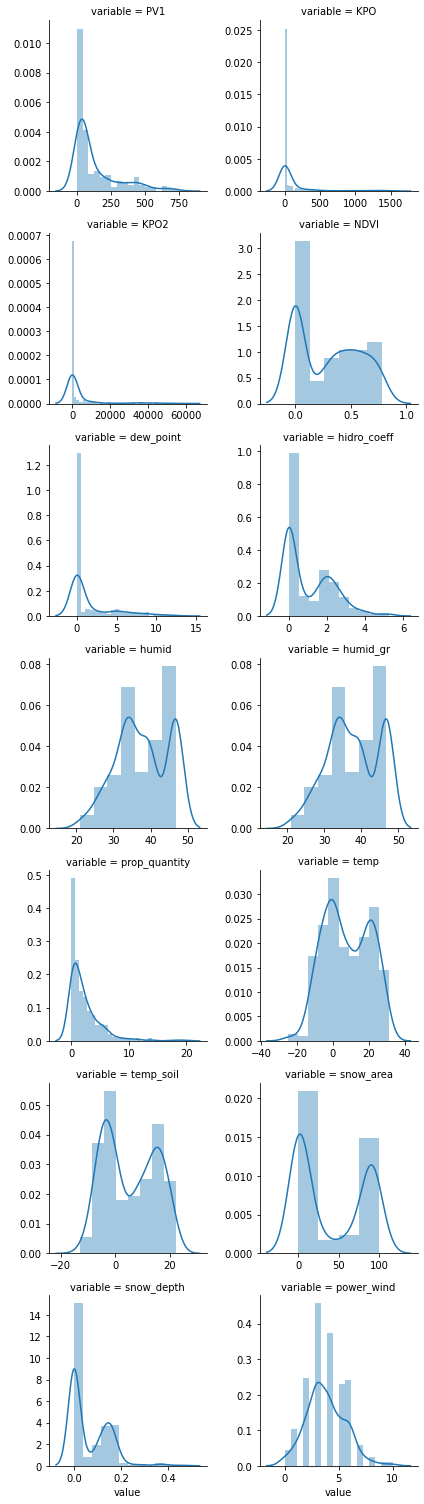

In [10]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Некоторые перерменные выглядят неплохими кандидатами на логарифмические и квадратичные преобразования

## Корреляция

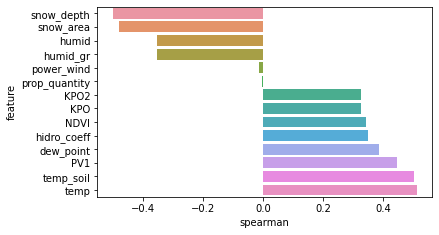

In [11]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['square'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative
spearman(df, features)

В этом случае лучше работать с корелляцией Спирмена, потому что она улавливает взаимосвязь между переменными даже если они нелинейны

Главные ценности имеют переменные temp(температура), temp_soil(температура почвенного покрова) snow_depth и snow_area, т.к. они отсеивают возможноть возникновения пожаров. Из индексов пожароопасности самым значимым оказался ПВ1. А менее значимыми - признаки prop_quantity(количество осадков) и power_wind(сила ветра)


,PV1,KPO,KPO2,NDVI,dew_point,hidro_coeff,humid,humid_gr,prop_quantity,temp,temp_soil,snow_area,snow_depth,power_wind,square,count
PV1,1.00,0.73,0.76,0.65,0.59,0.23,-0.69,-0.69,-0.33,0.73,0.75,-0.60,-0.50,-0.04,0.03,0.10
KPO,0.73,1.00,0.98,0.46,0.36,-0.04,-0.52,-0.52,-0.22,0.48,0.48,-0.34,-0.28,-0.07,-0.04,-0.00
KPO2,0.76,0.98,1.00,0.45,0.41,-0.05,-0.52,-0.52,-0.22,0.48,0.48,-0.33,-0.27,-0.07,-0.04,-0.01
NDVI,0.65,0.46,0.45,1.00,0.52,0.57,-0.87,-0.87,0.05,0.84,0.88,-0.90,-0.80,-0.01,-0.10,-0.01
dew_point,0.59,0.36,0.41,0.52,1.00,0.30,-0.43,-0.43,0.13,0.73,0.70,-0.52,-0.43,-0.04,0.12,0.14
hidro_coeff,0.23,-0.04,-0.05,0.57,0.30,1.00,-0.45,-0.45,0.08,0.53,0.56,-0.68,-0.63,0.02,0.21,0.19
humid,-0.69,-0.52,-0.52,-0.87,-0.43,-0.45,1.00,1.00,0.03,-0.74,-0.81,0.83,0.76,0.10,0.07,-0.03
humid_gr,-0.69,-0.52,-0.52,-0.87,-0.43,-0.45,1.00,1.00,0.03,-0.74,-0.81,0.83,0.76,0.10,0.07,-0.03
prop_quantity,-0.33,-0.22,-0.22,0.05,0.13,0.08,0.03,0.03,1.00,0.12,0.10,-0.06,-0.04,0.14,0.06,0.05
temp,0.73,0.48,0.48,0.84,0.73,0.53,-0.74,-0.74,0.12,1.00,0.98,-0.88,-0.75,0.09,0.18,0.25


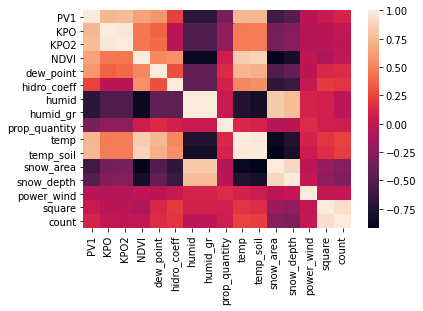

In [12]:
plt.figure(1)
sns.heatmap(df.corr())
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Между переменными существует множество сильных корреляций: Влажность почвы связана с относительной влажностью воздуха, как и температура с температурой почвы,что вполне логично

Коэффициенты пожароопасности между собой также довольно неплохо коррелируют, ведь они используют похожие данные в формуле для их получения, и коррелирую с теми данными, которые учитываются при расчёте

Количество пожаров и площадь пожара также коррелируют между собой


## Обзор зависимостей целевой переменной

Парные графики тоже полезно было бы рассмотреть, чтобы узнать как площадь пожаров связывается с каждой независимой переменной

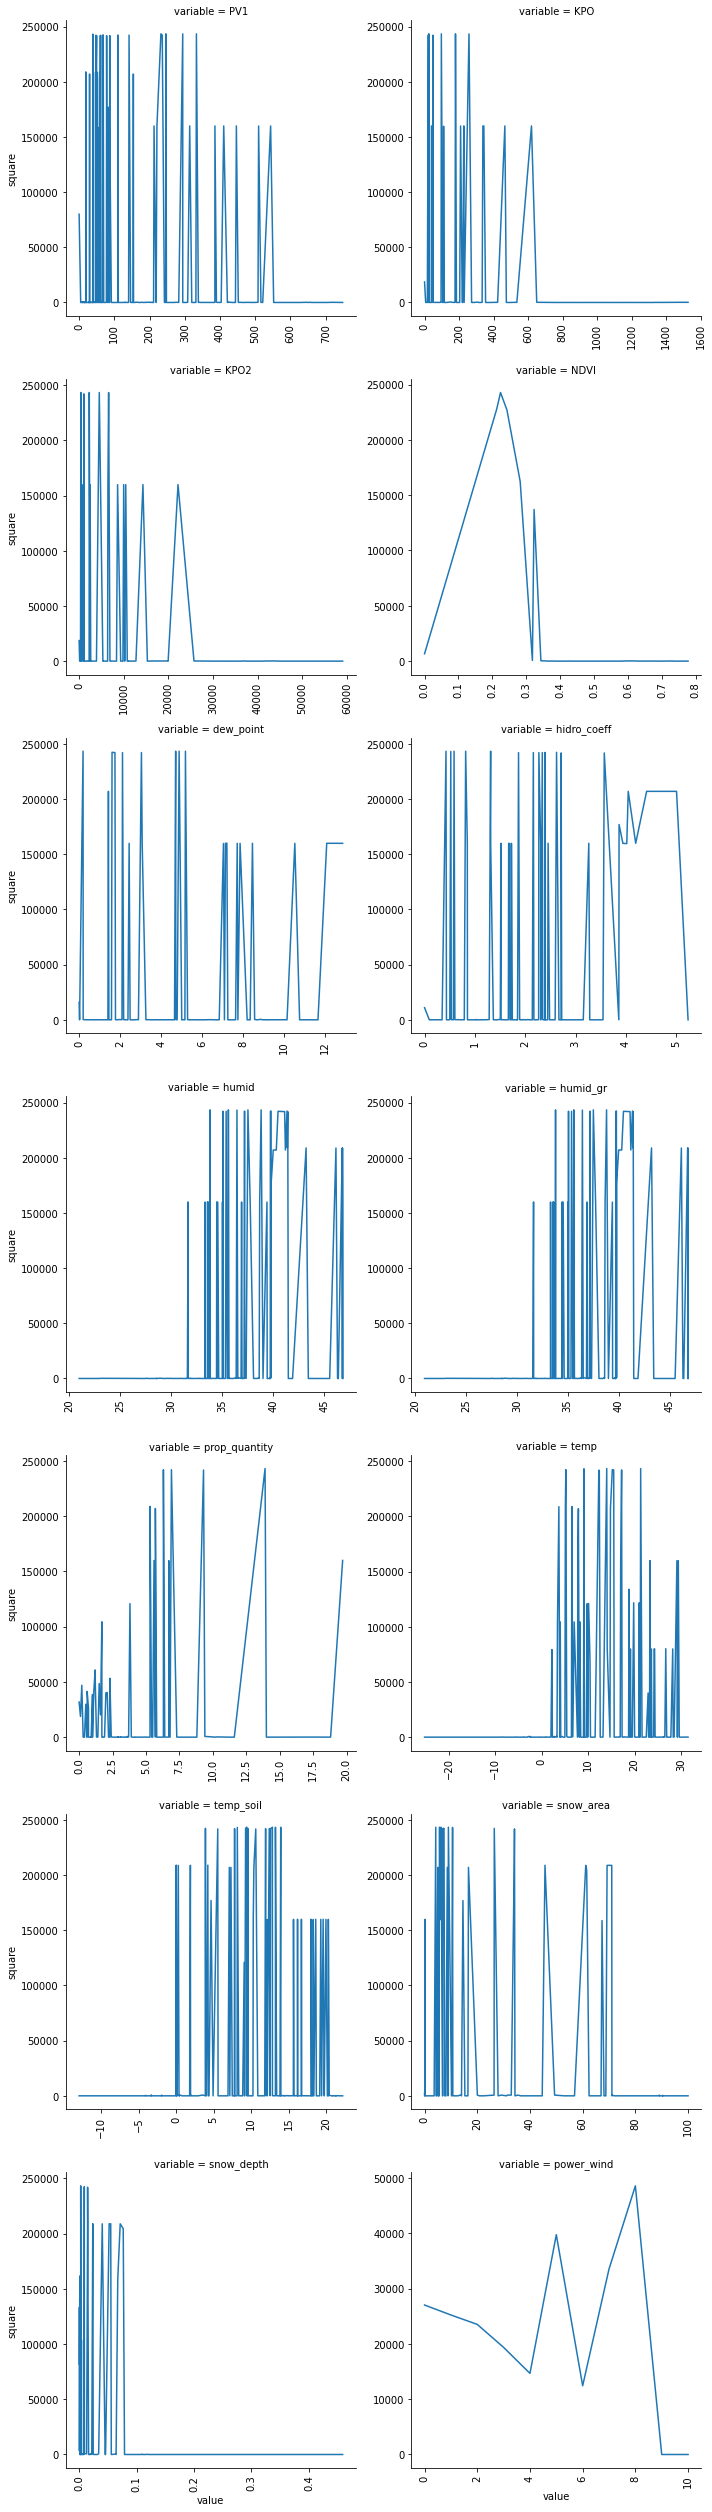

In [13]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['square'], value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "square")

## Использование моделей

Добавим признаки квадрата и логарифма исходных для увеличения выборки

In [14]:
def error(actual_train, predicted_train, actual, predicted):
    print('R2 На тестовой выборке', r2_score(actual, predicted))
    print('R2 На тренировочной выборке', r2_score(actual_train, predicted_train))

def log_transform(feature):
    df[feature+'_1'] = np.log1p(df[feature].values)

def quadratic(feature):
    df[feature+'_2'] = df[feature]**2
    
lst = ['PV1',
'KPO',
'KPO2',
'NDVI',
'dew_point',
'hidro_coeff',
'humid',
'humid_gr' ,
'prop_quantity' ,
'temp',
'temp_soil',
'snow_area',
'snow_depth',
'power_wind']
lst2=['PV1_2',
'KPO_2',
'KPO2_2',
'NDVI_2',
'dew_point_2',
'hidro_coeff_2',
'humid_2',
'humid_gr_2',
'prop_quantity_2',
'temp_2',
'temp_soil_2',
'snow_area_2',
'snow_depth_2',
'power_wind_2']

lst1=['PV1_1',
'KPO_1',
'KPO2_1',
'NDVI_1',
'dew_point_1',
'hidro_coeff_1',
'humid_1',
'humid_gr_1',
'prop_quantity_1',
'temp_1',
'temp_soil_1',
'snow_area_1',
'snow_depth_1',
'power_wind_1']

log_transform('PV1')
log_transform('KPO')
log_transform('KPO2')
log_transform('NDVI')
log_transform('dew_point')
log_transform('hidro_coeff')
log_transform('humid')
log_transform('humid_gr')
log_transform('prop_quantity' )
log_transform('temp')
log_transform('temp_soil' )
log_transform('snow_area')
log_transform('snow_depth')
log_transform('power_wind')


quadratic('PV1')
quadratic('KPO')
quadratic('KPO2')
quadratic('NDVI')
quadratic('dew_point')
quadratic('hidro_coeff')
quadratic('humid')
quadratic('humid_gr')
quadratic('prop_quantity')
quadratic('temp')
quadratic('temp_soil')
quadratic('snow_area')
quadratic('snow_depth')
quadratic('power_wind')

features = lst1+lst2+lst

In [15]:
!pip install catboost
clear_output()

Стандартизация данных дает прирост в точности

In [49]:
df[abs(df)==np.inf] = 0
df.fillna(0, inplace=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_train, X_test, y_train, y_test = train_test_split(df_scaled[features], df_scaled['square'],shuffle = True, test_size=0.25)
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

from catboost import CatBoostRegressor
reg = CatBoostRegressor()

reg.fit(X_train, y_train)
a = cross_val_score(reg, X, y, cv=5, scoring='r2').mean()
clear_output()
print('CatBoost model')
print('R2' , a)
print()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print('Linear model')
print('R2' ,cross_val_score(reg, X, y, cv=5, scoring='r2').mean())
print()
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
print('DecisionTree model')
print('R2' ,cross_val_score(reg, X, y, cv=5, scoring='r2').mean())


None

CatBoost model
R2 0.9264877499663363

Linear model
R2 0.706220863125186

DecisionTree model
R2 0.8294765422306476


Посмотрим 3 разные регрессионные модели и узнаем, что модель градиентного бустинга catboost дает наилучший результат - 0.926,
простая же линейная модель выдаёт результат 0.706

Добавление квадратов и логарифмов признаков дают увеличение в точности предсказаний